In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

# THIS PART WORKS WITH NO_RT

In [2]:
전data250_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 2 no RT/dwarf_dm_7e8_0250.txt")
dx250_noRT = 전data250_noRT[:,4]
dy250_noRT = 전data250_noRT[:,5]
dz250_noRT = 전data250_noRT[:,6]
r250_noRT = np.sqrt(dx250_noRT**2 + dy250_noRT**2 + dz250_noRT**2) # max: 7555.854234332741, closest to 7560
rad_array250_noRT = np.arange(10, 7560, 10, dtype=np.int64)
density_profile250_noRT = np.zeros(np.size(rad_array250_noRT))
i = 0
for radius_value in rad_array250_noRT:
    particles = np.where((r250_noRT > radius_value) & (r250_noRT < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile250_noRT[i] = how_many_particles / shell_volume
    i += 1
densityprof250_noRT = density_profile250_noRT / density_profile250_noRT[1]

In [3]:
# pick a halo mass, change the concentration

halo7 = NFW(9.936206e+07)
r_s7 = halo7.r_s()
c_vir7 = halo7.c_vir()
print('r_s =', r_s7)
print('c_vir =', c_vir7)

radius7 = np.arange(0.01, 7.56, 0.01) #unit: kpc

r_s = 0.6152641863869838
c_vir = 19.683273906325702


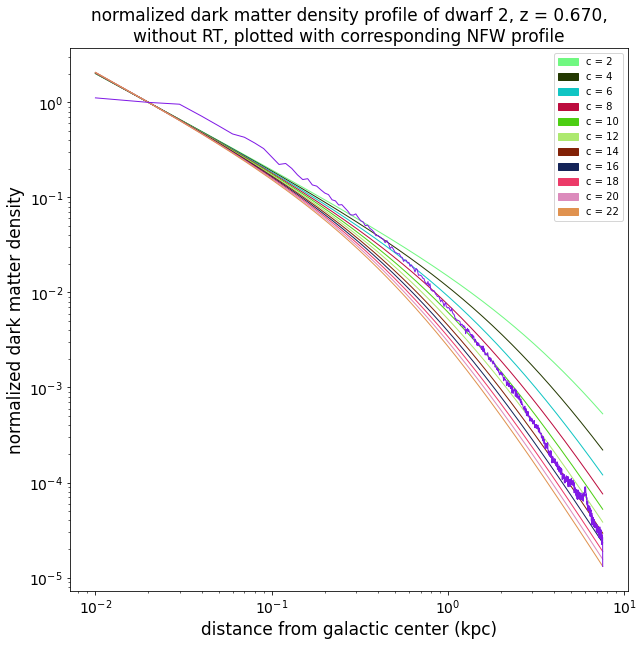

In [4]:
# best fit attempt 1

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in range(2, 24, 2):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile7 = halo7.rho(radius7, c_value)
    NFWdensityprof_noRT = density_profile7 / density_profile7[1]
    plt.plot(radius7, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(c_value))
    all_the_legends.append(each_legend)

plt.plot(radius7, densityprof250_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\nwithout RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

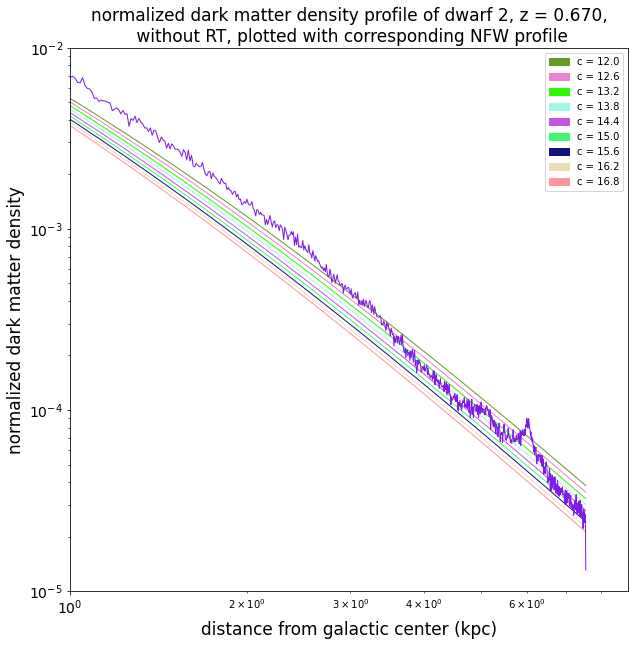

In [5]:
# best fit attempt 2

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in np.arange(12, 17, 0.6):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile7 = halo7.rho(radius7, c_value)
    NFWdensityprof_noRT = density_profile7 / density_profile7[1]
    plt.plot(radius7, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(round(c_value, 1)))
    all_the_legends.append(each_legend)

plt.plot(radius7, densityprof250_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**0,10**0.95)
plt.ylim(10**-5,10**-2)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

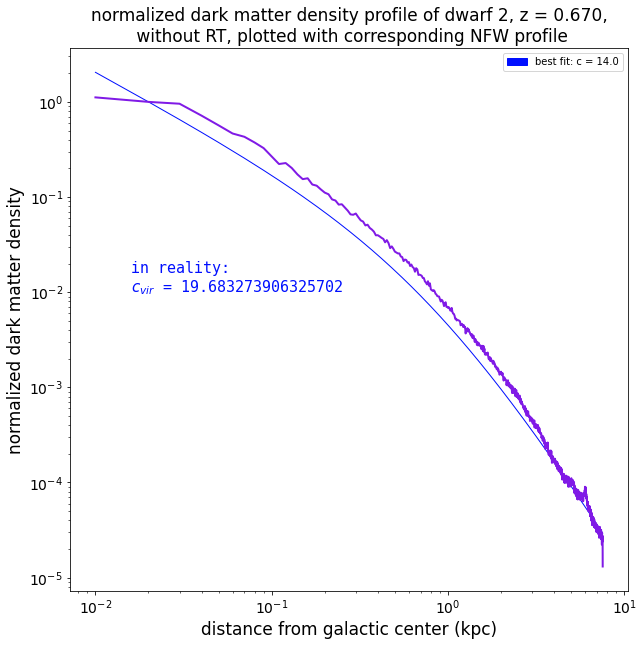

In [6]:
# plotting the best fit, NORMALIZED

plt.figure(figsize=(10,10))

density_profile7 = halo7.rho(radius7, c=14.0)
NFWdensityprof_noRT = density_profile7 / density_profile7[1]
plt.plot(radius7, NFWdensityprof_noRT, color='#000FFF', linewidth=1)
legend = mpatches.Patch(color='#000FFF', label='best fit: c = 14.0')

plt.plot(radius7, densityprof250_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=2)
    
plt.legend(handles=[legend], loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.text(10**-1.8, 10**-2, '''in reality:\n$c_{vir}$ = 19.683273906325702''', \
         fontsize=15, color='#000FFF', fontfamily='monospace')

plt.show()

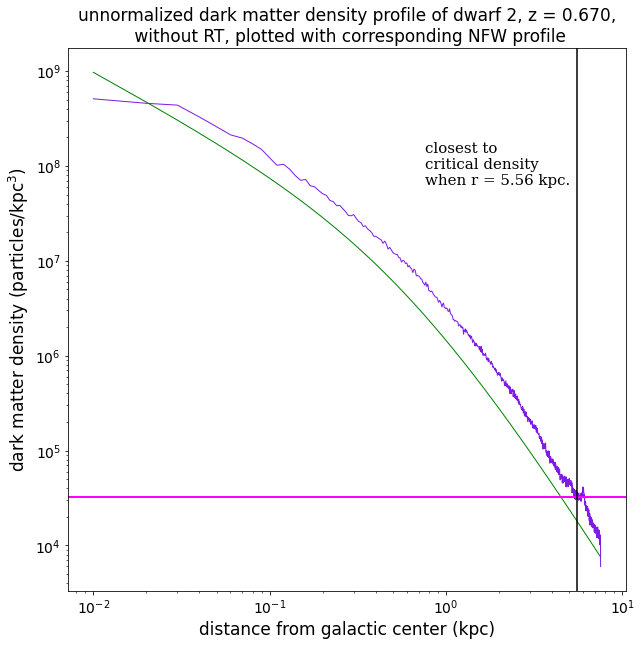

In [7]:
# plotting the best fit, UNNORMALIZED

dx250_noRT = 전data250_noRT[:,4] / 1000 # converting pc to kpc
dy250_noRT = 전data250_noRT[:,5] / 1000 # converting pc to kpc
dz250_noRT = 전data250_noRT[:,6] / 1000 # converting pc to kpc
r250_noRT = np.sqrt(dx250_noRT**2 + dy250_noRT**2 + dz250_noRT**2) # max: 7555.854234332741, closest to 7560
rad_array250_noRT = np.arange(0.01, 7.56, 0.01)

density_profile250_noRT = np.zeros(np.size(rad_array250_noRT))
i = 0
for radius_value in rad_array250_noRT:
    particles = np.where((r250_noRT > radius_value) & (r250_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile250_noRT[i] = how_many_particles / shell_volume
    i += 1

rho_crit = 200 * 161.7
deviation_from_rho_crit = abs(density_profile250_noRT * 500 - rho_crit)
index = np.where(deviation_from_rho_crit == min(deviation_from_rho_crit))
radius_at_rho_crit = rad_array250_noRT[index][0]
result = "closest to\ncritical density\nwhen r = " + str(radius_at_rho_crit) + " kpc."    
    
density_profile7 = halo7.rho(radius7)

plt.figure(figsize=(10, 10))

plt.plot(radius7, density_profile7, color='green', linewidth=1)
plt.plot(radius7, density_profile250_noRT * 500, color=(0.5, 0.1, 0.9, 1), linewidth=1)
plt.axhline(rho_crit, color='#FF00FF', linewidth=2)
plt.axvline(radius_at_rho_crit, color='black')       
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density (particles/kpc$^3$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('unnormalized dark matter density profile of dwarf 2, z = 0.670,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.text(10**-0.12, 10**7.8, result, \
         fontsize=15, color='black', fontfamily='serif')

plt.show()

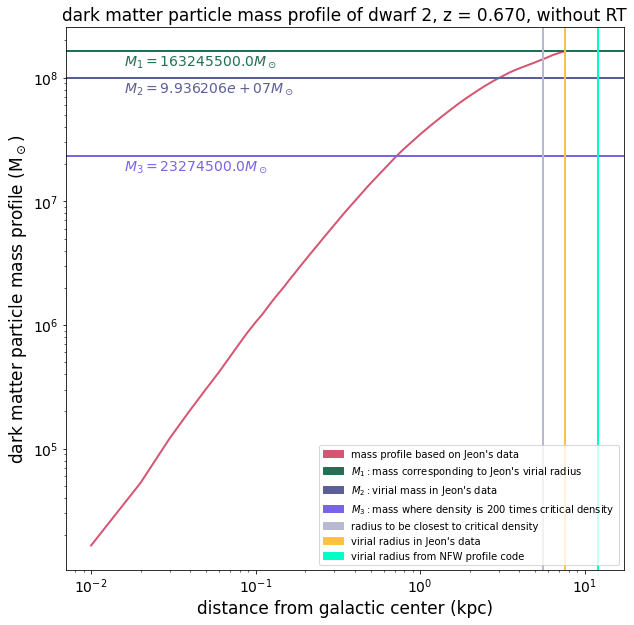

In [21]:
# plotting the mass profile at this redshift

mass_profile250_noRT = np.zeros(np.size(rad_array250_noRT))
h = 0
for radius_value in rad_array250_noRT:
    particles = np.where((r250_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    mass_profile250_noRT[h] = how_many_particles * 500
    h += 1
    
rho_crit_200 = rho_crit * 200
deviate = abs(density_profile250_noRT * 500 - rho_crit_200)
ind = np.where(deviate == min(deviate))
mass_at_200_times_rho_crit = mass_profile250_noRT[ind][0]

plt.figure(figsize=(10,10))

plt.plot(radius7, mass_profile250_noRT, color='#D55672', linewidth=2)
plt.axhline(mass_profile250_noRT[np.size(mass_profile250_noRT) - 1], color='#226F54', linewidth=2)
plt.axhline(9.936206e+07, color='#5B5F97', linewidth=2)
plt.axhline(mass_at_200_times_rho_crit, color='#7765E3', linewidth=2)
plt.axvline(radius_at_rho_crit, color='#B8B8D1', linewidth=2)
plt.axvline(7.555876e+03 * 0.001, color='#FFC145', linewidth=2)
plt.axvline(halo7.r_vir(), color='#00FFC5', linewidth=2)
legend1 = mpatches.Patch(color='#D55672', label="mass profile based on Jeon's data")
legend2 = mpatches.Patch(color='#226F54', label="$M_1:$mass corresponding to Jeon's virial radius")
legend3 = mpatches.Patch(color='#5B5F97', label="$M_2:$virial mass in Jeon's data")
legend3a = mpatches.Patch(color='#7765E3', label="$M_3:$mass where density is 200 times critical density")
legend4 = mpatches.Patch(color='#B8B8D1', label="radius to be closest to critical density")
legend5 = mpatches.Patch(color='#FFC145', label="virial radius in Jeon's data")
legend6 = mpatches.Patch(color='#00FFC5', label="virial radius from NFW profile code")

plt.legend(handles=[legend1, legend2, legend3, legend3a, legend4, legend5, legend6], loc='lower right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 2, z = 0.670, without RT', loc='center', fontsize=17)
plt.text(10**-1.8, 10**8.1, '''$M_1 = ''' + str(mass_profile250_noRT[np.size(mass_profile250_noRT) - 1]) + \
         '''M_\odot$''', fontsize=14, color='#226F54')
plt.text(10**-1.8, 10**7.88, '''$M_2 = 9.936206e+07 M_\odot$''', \
         fontsize=14, color='#5B5F97')
plt.text(10**-1.8, 10**7.25, '''$M_3 = ''' + str(mass_at_200_times_rho_crit) + \
         '''M_\odot$''', fontsize=14, color='#7765E3')

plt.show()

# THIS PART WORKS WITH RT

In [9]:
전data250 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 2 RT/dwarf_dm_7e8_rt_0250.txt")
dx250 = 전data250[:,4]
dy250 = 전data250[:,5]
dz250 = 전data250[:,6]
r250 = np.sqrt(dx250**2 + dy250**2 + dz250**2) # max: 7538.892806053154, closest to 7540
rad_array250 = np.arange(10, 7540, 10, dtype=np.int64)
density_profile250 = np.zeros(np.size(rad_array250))
i = 0
for radius_value in rad_array250:
    particles = np.where((r250 > radius_value) & (r250 < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile250[i] = how_many_particles / shell_volume
    i += 1
densityprof250 = density_profile250 / density_profile250[1]

In [10]:
# pick a halo mass, change the concentration

halo8 = NFW(9.869691e+07)
r_s8 = halo8.r_s()
c_vir8 = halo8.c_vir()
print('r_s =', r_s8)
print('c_vir =', c_vir8)

radius8 = np.arange(0.01, 7.54, 0.01) #unit: kpc

r_s = 0.6135790395348271
c_vir = 19.693191919944415


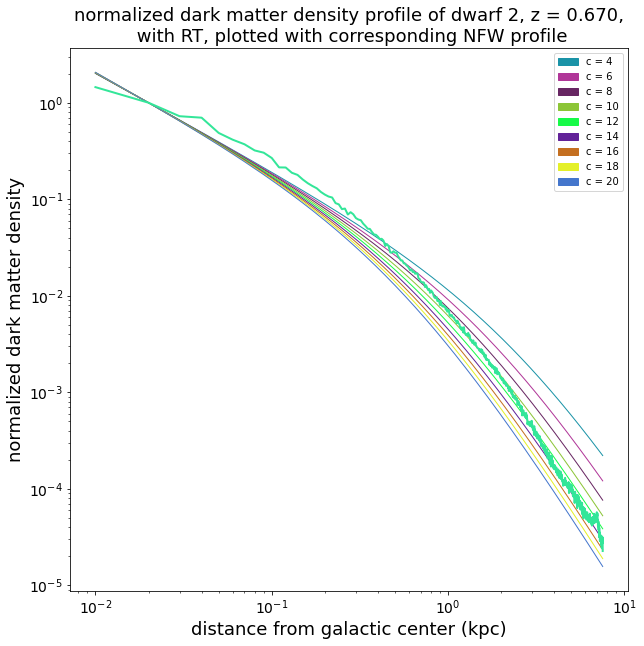

In [11]:
# best fit attempt 1

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in range(4, 22, 2):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile8 = halo8.rho(radius8, c_value)
    NFWdensityprof_noRT = density_profile8 / density_profile8[1]
    plt.plot(radius8, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(c_value))
    all_the_legends.append(each_legend)

plt.plot(radius8, densityprof250, color=(0.2, 0.9, 0.6, 1), linewidth=2)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=18)
plt.ylabel('normalized dark matter density', fontsize=18) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=18)

plt.show()

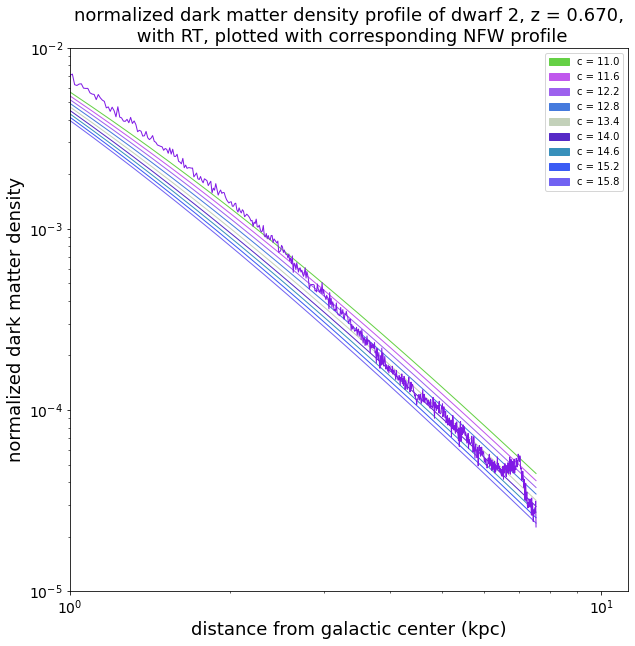

In [12]:
# best fit attempt 2

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in np.arange(11, 16, 0.6):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile8 = halo8.rho(radius8, c_value)
    NFWdensityprof = density_profile8 / density_profile8[1]
    plt.plot(radius8, NFWdensityprof, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(round(c_value, 1)))
    all_the_legends.append(each_legend)

plt.plot(radius8, densityprof250, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=18)
plt.ylabel('normalized dark matter density', fontsize=18) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**0,10**1.05)
plt.ylim(10**-5,10**-2)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\n with RT, plotted with corresponding NFW profile' ,\
          loc='center', fontsize=18)

plt.show()

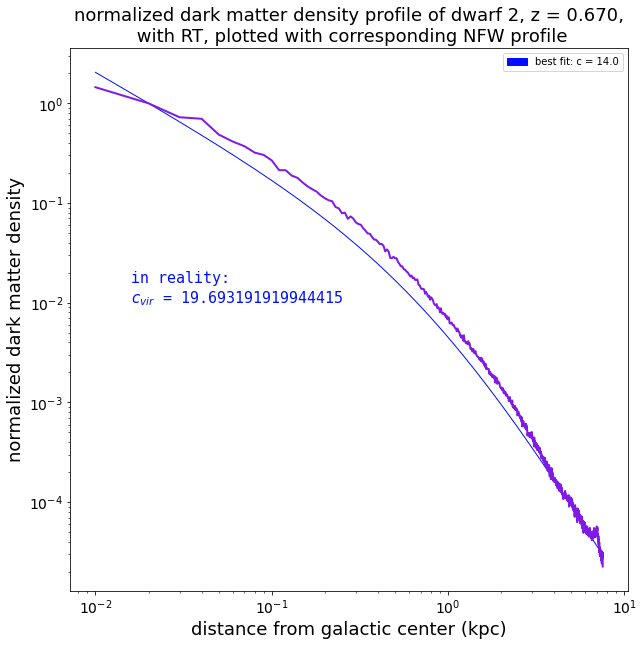

In [13]:
# plotting the best fit, NORMALIZED

plt.figure(figsize=(10,10))

density_profile8 = halo8.rho(radius8, c=14.0)
NFWdensityprof = density_profile8 / density_profile8[1]
plt.plot(radius8, NFWdensityprof, color='#000FFF', linewidth=1)
legend = mpatches.Patch(color='#000FFF', label='best fit: c = 14.0')

plt.plot(radius8, densityprof250, color=(0.5, 0.1, 0.9, 1), linewidth=2)
    
plt.legend(handles=[legend], loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=18)
plt.ylabel('normalized dark matter density', fontsize=18) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=18)
plt.text(10**-1.8, 10**-2, '''in reality:\n$c_{vir}$ = 19.693191919944415''', \
         fontsize=15, color='#000FFF', fontfamily='monospace')

plt.show()

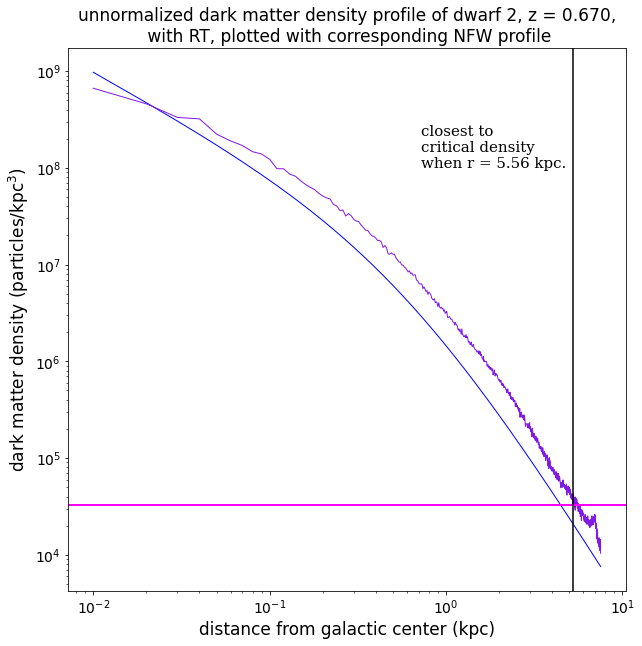

In [14]:
# plotting the best fit, UNNORMALIZED

dx250 = 전data250[:,4] / 1000 # converting pc to kpc
dy250 = 전data250[:,5] / 1000 # converting pc to kpc
dz250 = 전data250[:,6] / 1000 # converting pc to kpc
r250 = np.sqrt(dx250**2 + dy250**2 + dz250**2)
rad_array250 = np.arange(0.01, 7.54, 0.01) # unit: kpc

density_profile250 = np.zeros(np.size(rad_array250))
i = 0
for radius_value in rad_array250:
    particles = np.where((r250 > radius_value) & (r250 < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile250[i] = how_many_particles / shell_volume
    i += 1

rho_crit = 200 * 161.7
deviation_from_rho_crit = abs(density_profile250 * 500 - rho_crit)
index = np.where(deviation_from_rho_crit == min(deviation_from_rho_crit))
rad_at_rho_crit = rad_array250[index][0]
result = "closest to\ncritical density\nwhen r = " + str(radius_at_rho_crit) + " kpc."    

density_profile8 = halo8.rho(radius8)

plt.figure(figsize=(10, 10))

plt.plot(radius8, density_profile8, color='blue', linewidth=1)
plt.plot(radius8, density_profile250 * 500, color=(0.5, 0.1, 0.9, 1), linewidth=1)
plt.axhline(rho_crit, color='#FF00FF', linewidth=2)
plt.axvline(rad_at_rho_crit, color='black')       

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density (particles/kpc$^3$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('unnormalized dark matter density profile of dwarf 2, z = 0.670,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.text(10**-0.14, 10**8, result, \
         fontsize=15, color='black', fontfamily='serif')

plt.show()

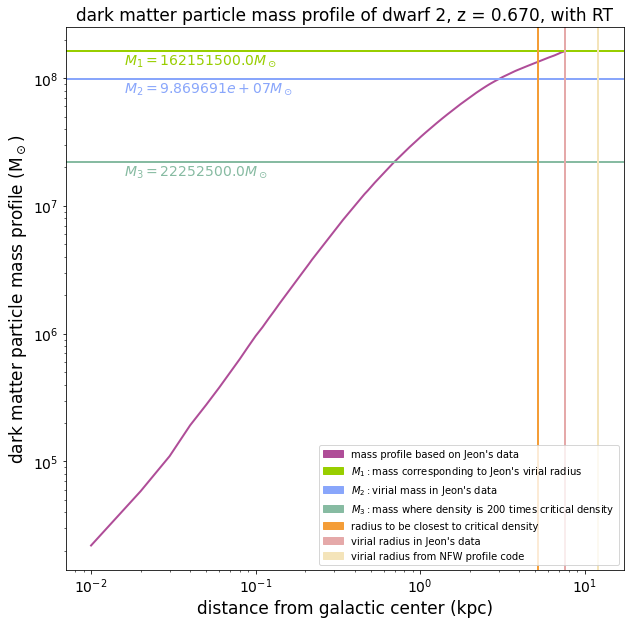

In [30]:
# plotting the mass profile at this redshift

mass_profile250 = np.zeros(np.size(rad_array250))
h = 0
for radius_value in rad_array250:
    particles = np.where((r250 < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    mass_profile250[h] = how_many_particles * 500
    h += 1

rho_crit_200 = rho_crit * 200
deviate = abs(density_profile250 * 500 - rho_crit_200)
ind = np.where(deviate == min(deviate))
mass_at_200_times_rho_crit = mass_profile250[ind][0]
    
plt.figure(figsize=(10,10))

plt.plot(radius8, mass_profile250, color='#AF4D98', linewidth=2)
plt.axhline(mass_profile250[np.size(mass_profile250) - 1], color='#98CE00', linewidth=2)
plt.axhline(9.869691e+07, color='#89A6FB', linewidth=2)
plt.axhline(mass_at_200_times_rho_crit, color='#87BBA2', linewidth=2)
plt.axvline(rad_at_rho_crit, color='#F49D37', linewidth=2)
plt.axvline(7.538991e+03 * 0.001, color='#E5A9A9', linewidth=2)
plt.axvline(halo8.r_vir(), color='#F4E4BA', linewidth=2)
legend1 = mpatches.Patch(color='#AF4D98', label="mass profile based on Jeon's data")
legend2 = mpatches.Patch(color='#98CE00', label="$M_1:$mass corresponding to Jeon's virial radius")
legend3 = mpatches.Patch(color='#89A6FB', label="$M_2:$virial mass in Jeon's data")
legend3a = mpatches.Patch(color='#87BBA2', label="$M_3:$mass where density is 200 times critical density")
legend4 = mpatches.Patch(color='#F49D37', label="radius to be closest to critical density")
legend5 = mpatches.Patch(color='#E5A9A9', label="virial radius in Jeon's data")
legend6 = mpatches.Patch(color='#F4E4BA', label="virial radius from NFW profile code")

plt.legend(handles=[legend1, legend2, legend3, legend3a, legend4, legend5, legend6], loc='lower right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 2, z = 0.670, with RT', loc='center', fontsize=17)
plt.text(10**-1.8, 10**8.11, '''$M_1 = ''' + str(mass_profile250[np.size(mass_profile250) - 1]) + \
         '''M_\odot$''', fontsize=14, color='#98CE00')
plt.text(10**-1.8, 10**7.89, '''$M_2 = 9.869691e+07 M_\odot$''', \
         fontsize=14, color='#89A6FB')
plt.text(10**-1.8, 10**7.24, '''$M_3 = ''' + str(mass_at_200_times_rho_crit) + \
         '''M_\odot$''',fontsize=14, color='#87BBA2')

plt.show()